# Chapter 1

file : [d-ibm3dx7008.txt](https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/fts3/d-ibm3dx7008.txt)

Page 26 Exercise 1

## 1. Basic Statistics

In [3]:
import pandas as pd
data = pd.read_csv('./d-ibm3dx7008.txt', sep=r'\s+', parse_dates=['Date'], index_col='Date')

In [4]:
data

,rtn,vwretd,ewretd,sprtrn
Date,,,,
1970-01-02,0.000686,0.012137,0.033450,0.010211
1970-01-05,0.009596,0.006375,0.018947,0.004946
1970-01-06,0.000679,-0.007233,-0.005776,-0.006848
1970-01-07,0.000678,-0.001272,0.003559,-0.002047
1970-01-08,0.002034,0.000564,0.002890,0.000540
...,...,...,...,...
2008-12-24,-0.000993,0.004463,0.005254,0.005781
2008-12-26,0.010060,0.007170,0.011629,0.005356
2008-12-29,-0.000984,-0.004481,-0.016514,-0.003873


## 1.1 Set data series and percentage simple retuns series

In [5]:
ibm = data['rtn']
sibm = ibm * 100

In [6]:
sibm.describe()

count    9845.000000
mean        0.040161
std         1.692544
min       -22.963000
25%        -0.857100
50%         0.000000
75%         0.883300
max        13.163600
Name: rtn, dtype: float64

## 1.2. Find size of the data: 9845 rows and 5 columns
Count Rows and Columns

In [8]:
print(f'Rows : {len(data.index)}')
print(f'Columns : {len(data.columns)}')

Rows : 9845
Columns : 4


In [31]:
from scipy.stats import kurtosis, skew
kurt = kurtosis(sibm, fisher=True)
skw = skew(sibm)
print(f'Kurtosis: {kurt:.6f}')
print(f'Skewness: {skw:.6f}')

Kurtosis: 9.918984
Skewness: 0.061408


## 1.3. Simple tests

In [29]:
import math
s1 = skw
t1 = s1/math.sqrt(6/9845)
print(f'test stats: {t1:.6f}')

test stats: 2.487472


In [30]:
from scipy.stats import norm

# Compute p-value
p_value = 2 * (1 - norm.cdf(abs(t1)))
print(f'p-value: {p_value:.6f}')

p-value: 0.012865


## Turn to log returns in percentages

To transform a Python Pandas Series into its logarithmic values, you can use the numpy library, which provides a function np.log() for this purpose. 

This function is applied element-wise to each value in the Series.

In [37]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp

# Assuming 'data_series' is your Pandas Series
# For example, it might be a column in a DataFrame
# data_series = df['your_column']

# Transform the series into its logarithmic values
libm = (np.log(ibm+1))* 100

# Test mean being zero.
t_stat, p_value = ttest_1samp(libm,0)
print(f'T-stat: {t_stat:.6f}')
print(f'P-value: {p_value:.6f}')

T-stat: 1.512621
P-value: 0.130408


The result show that the hypothesis of zero expected return cannot be rejected at the 5% or 10% level.

## Conduct a T-test
Test if the mean of log returns is significantly different from zero.

In [12]:
from scipy.stats import skew, ttest_1samp, norm
import math
s1 = skew(data['rtn'])
t1 = s1/math.sqrt(6/9845)
p_value = 2 * (1 - norm.cdf(abs(t1)))
# print(f'T-statistic: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')

P-value: 0.0129


##  Normality Test (Jarque-Bera)
This test checks if the data is normally distributed.

In [7]:
from scipy.stats import jarque_bera
jb_stat, jb_p_value = jarque_bera(log_returns)
print(f'Jarque-Bera statistic: {jb_stat:.4f}')

Jarque-Bera statistic: 60921.9343


This code assumes the dataset has a column named 'rtn' for the returns. You would need to adjust the column names and the file path according to your actual dataset. Once you have the dataset, you can run this code to perform the analysis as described in the book.

## Draw a Histogram

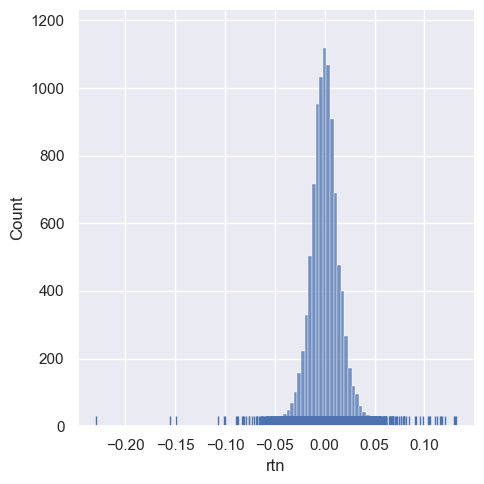

In [8]:
import seaborn as sns; sns.set()
sns.displot(data['rtn'], bins=100, kde=False, rug=True)